# Creata database

In [1]:
from pathlib import Path

import h5py
import numpy as np
from magtense.utils import plot_M_thin_film

from koopmag.database import create_db_mp
from koopmag.utils import plot_dynamics

In [16]:
db_kwargs = {
    "res": [36, 9, 1],
    "grid_size": [500e-9, 125e-9, 3e-9],
    "n_seq": 4,
    "t_steps": 200,
    "t_per_step": 10e-12,
    "cuda": True,
}

create_db_mp("std_prob_4", n_workers=1, **db_kwargs)

100%|██████████| 4/4 [00:01<00:00,  2.20it/s]


/home/s204790/koopman-magnetics/src/koopmag/../../data/4_200_36_9_0_4.h5
Database created


## Inspect database

In [17]:
datapath = Path().cwd().parent / "data"
db = h5py.File(datapath / "4_200_36_9.h5", "r")

print("Attributes of database:")
for key in db.attrs:
    print(f"{key}: {db.attrs[key]}")

print("\nData in the database:")
for key in db:
    print(f"{key}: {db[key].shape}")

Attributes of database:
grid_size: [5.00e-07 1.25e-07 3.00e-09]
h_ext_angle: [  0 360]
h_ext_norm: [ 0 50]
res: [36  9  1]
seed: 0
t_per_step: 1e-11
t_steps: 200

Data in the database:
field: (4, 3)
sequence: (4, 200, 36, 9, 3)


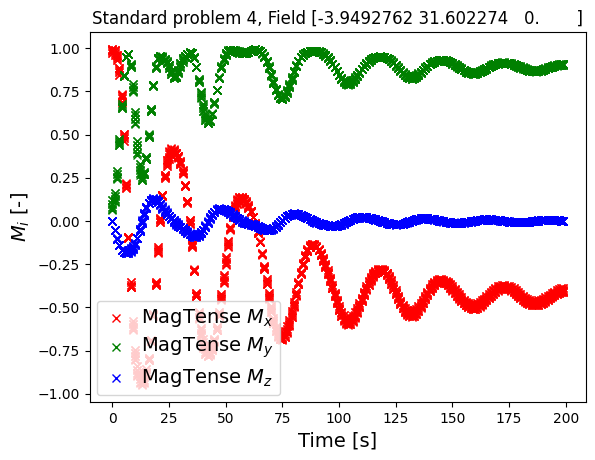

In [18]:
field_idx = 0
plot_dynamics(
    np.arange(db["sequence"][field_idx].shape[0]),
    db["sequence"][field_idx],
    field=db["field"][field_idx],
)

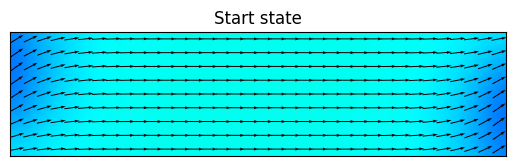

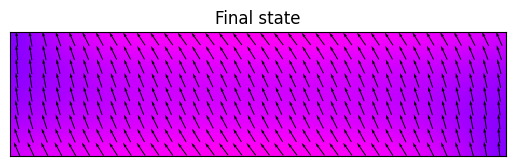

In [19]:
plot_M_thin_film(db["sequence"][field_idx][0], db.attrs["res"], "Start state")
plot_M_thin_film(db["sequence"][field_idx][-1], db.attrs["res"], "Final state")

In [7]:
db.close()